In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [7]:
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
bos['MEDV']=boston.target

In [42]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


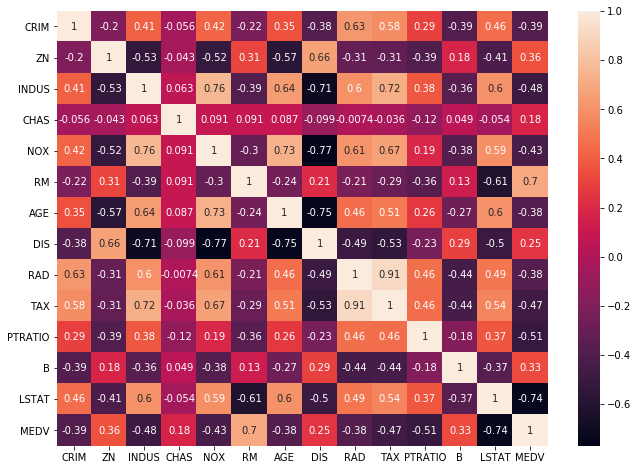

In [10]:
plt.figure(figsize=(11,8))
sns.heatmap(bos.corr(),annot=True)

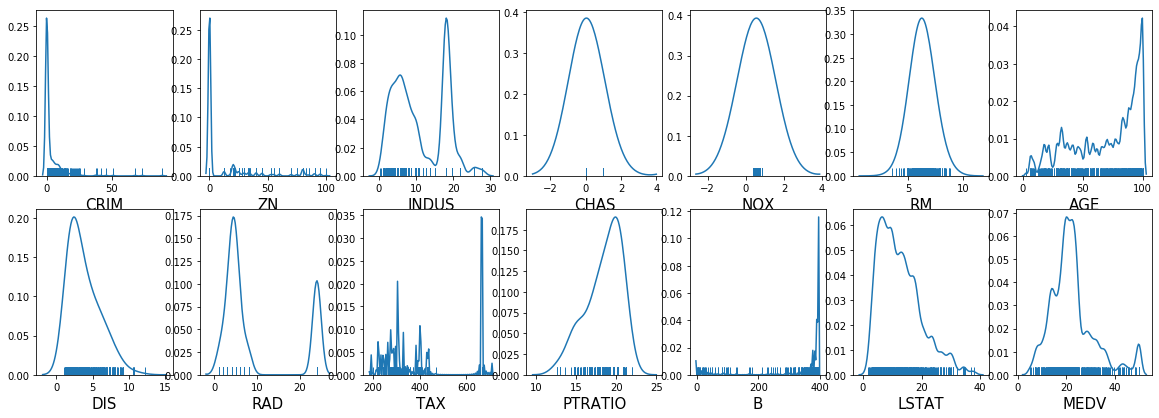

In [18]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=14 :     # as there are 9 columns in the data
        ax = plt.subplot(7,7,plotnumber)
        #sns.distplot(bos[column])
        sns.distplot(bos[column], hist = False, rug = True, kde_kws = {'bw' : 1})
        plt.xlabel(column,fontsize=15)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

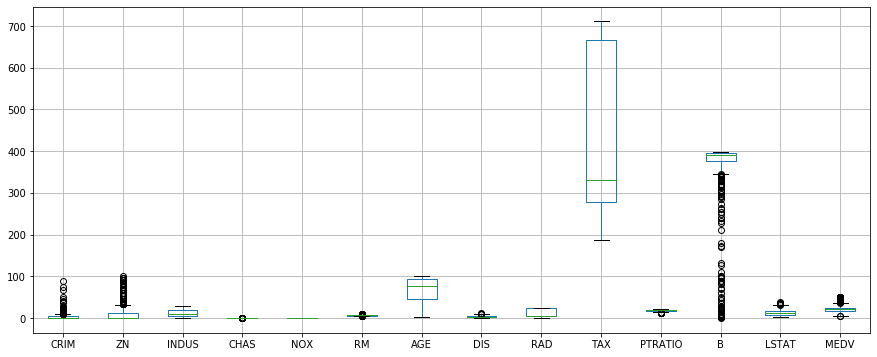

In [21]:
plt.figure(figsize=(15,6))
bos.boxplot()

In [19]:
q = bos['CRIM'].quantile(0.98)
data_cleaned = bos[bos['CRIM']<q]
q = bos['ZN'].quantile(0.95)
data_cleaned = bos[bos['ZN']<q]
q = bos['RM'].quantile(0.99)
data_cleaned = bos[bos['RM']<q]
q = bos['DIS'].quantile(0.99)
data_cleaned = bos[bos['DIS']<q]
q = bos['PTRATIO'].quantile(0.99)
data_cleaned = bos[bos['PTRATIO']<q]
q = bos['B'].quantile(0.92)
data_cleaned = bos[bos['B']<q]
q = bos['LSTAT'].quantile(0.99)
data_cleaned = bos[bos['LSTAT']<q]
q = bos['MEDV'].quantile(0.98)
data_cleaned = bos[bos['MEDV']<q]

In [23]:
X = bos.drop('MEDV',axis=1)
y = bos['MEDV']

In [24]:


from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled



array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


In [27]:
X =bos.drop(columns = ['TAX'])
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,21.0,393.45,6.48,22.0


In [28]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state=355)

regression = LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [35]:
predictions = regression.predict(x_test)
print(x_test[0])

pd.DataFrame({'actual value': y_test, 'predictions':predictions}).sample(5)

[-0.40296135 -0.48772236  2.42256516 -0.27259857  0.469104   -1.18337049
  0.85790231 -0.93844651 -0.6379618   1.79819419  0.76033959  0.42120644
  0.75791078]


,actual value,predictions
350,22.9,20.061048
281,35.4,34.352774
185,29.6,24.965442
325,24.6,24.481989
165,25.0,25.653733


In [34]:
regression.score(x_train, y_train)

0.721023065623692

In [31]:
regression.score(x_test, y_test)

0.8402660786229565

In [32]:
from sklearn import metrics
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 2.419334139707543
MSE 10.354889938462037
RMSE 3.2179014805400796


In [43]:
regression.predict(scaler.transform([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14]]))

array([25.05786806])

In [46]:
## Ridge
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score
rr = Ridge(alpha=0.01)
rr.fit(x_train, y_train) 
pred_train_rr= rr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_rr)))
print(r2_score(y_train, pred_train_rr))

pred_test_rr= rr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_rr))) 
print(r2_score(y_test, pred_test_rr))



4.991488675847212
0.7210230634640958
3.2177896658122926
0.8402771792080661


In [47]:
rr.score(x_test, y_test)

0.8402771792080661

In [54]:
rr.predict(scaler.transform([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14]]))

array([25.05787539])

In [49]:
# Lasso
lr = Lasso(alpha=0.01)
lr.fit(x_train, y_train) 
pred_train_lr= lr.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print(r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print(r2_score(y_test, pred_test_lr))

4.992240942043034
0.7209389680181284
3.200941201806763
0.8419454292605836


In [51]:
lr.score(x_test, y_test)

0.8419454292605836

In [53]:
lr.predict(scaler.transform([[0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14]]))

array([25.03180596])